<a href="https://colab.research.google.com/github/siricharana/Salary_Predicition/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB
None
               AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2636.000000    2639.000000  263

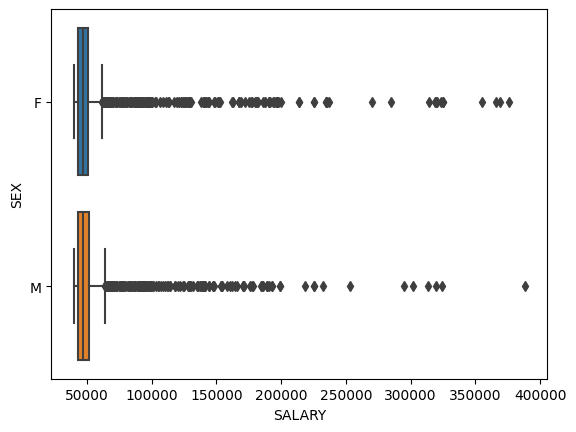

<ipython-input-4-d4811e8e2ae0>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


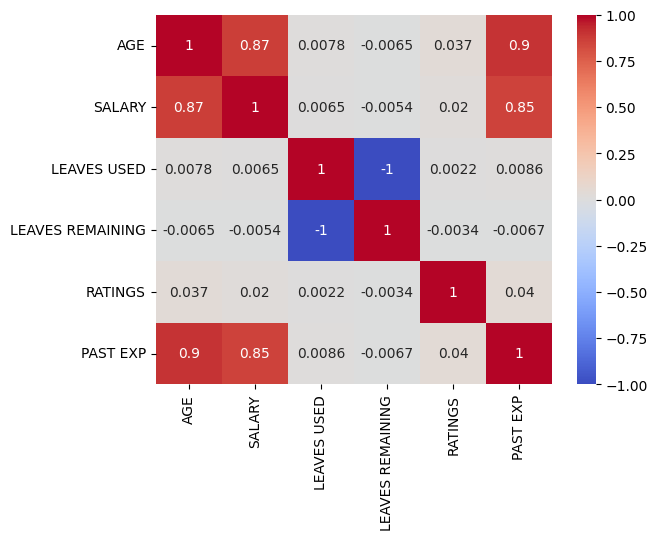

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv('/content/Salary Prediction of Data Professions.csv')
# Data Inspection
print(df.info())
print(df.describe())
# Data Visualization
sns.boxplot(x='SALARY', y='SEX', data=df)
plt.show()
# Identify Patterns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Remove rows with NaN values
df = df.dropna()

In [ ]:
from datetime import datetime
# Create New Features
df['EXPERIENCE'] = (pd.to_datetime(df['CURRENT DATE']) - pd.to_datetime(df['DOJ'])).dt.days // 365
df['LEAVE_HISTORY'] = df['LEAVES USED'] + df['LEAVES REMAINING']
# Transform Existing Features
df['GENDER'] = df['SEX'].apply(lambda x: 1 if x == 'Male' else 0)
df = pd.get_dummies(df, columns=['DESIGNATION'])


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
df['RATINGS'].fillna(df['RATINGS'].mean(), inplace=True)
# Encode Categorical Variables
# (Assuming 'UNIT' is a categorical variable)
df = pd.get_dummies(df, columns=['UNIT'])
# Scale/Normalize Features
scaler = StandardScaler()
df[['AGE', 'EXPERIENCE', 'RATINGS', 'LEAVE_HISTORY']] = scaler.fit_transform(df[['AGE', 'EXPERIENCE', 'RATINGS', 'LEAVE_HISTORY']])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Split data into features and target
X = df.drop(['FIRST NAME', 'LAST NAME', 'SALARY', 'SEX', 'DOJ', 'CURRENT DATE'], axis=1)
y = df['SALARY']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# Make predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
# Evaluate models
print(f'Linear Regression - MAE: {mean_absolute_error(y_test, lr_preds)}, R-squared: {r2_score(y_test, lr_preds)}')
print(f'Random Forest - MAE: {mean_absolute_error(y_test, rf_preds)}, R-squared: {r2_score(y_test, rf_preds)}')


Linear Regression - MAE: 4048.396584440228, R-squared: 0.9623117905270117
Random Forest - MAE: 4336.9507331460445, R-squared: 0.9498931459741405
